In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Marketing Analysis

<img style="margin-left:0" src="https://www.haleymarketing.com/wp-content/uploads/2020/07/graphs-job-laptop-papers-590016-1.jpg" width="600px" />

### Story

We are a marketing analyst team and we've been told by the CMO that recent marketing campaigns have not been as effective as they were expected to be. 

### Goal

We need to analyze the dataset to understand this problem and propose data-driven solutions.


In [2]:
marketing_df = pd.read_csv('data/marketing_data.csv')

In [3]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
raise Exception('foo')

Exception: foo

Marketing campaign dataset contains information about:

### Customer Profile

- **Year_Birth**
- **Education**
- **Marital Status**
- **Income** - Yearly Household Income
- **Kidhome** - Number of children in household
- **Teenhome** - Number of teenagers in household
- **Country** - customer location

### Product Preferences

- **Recency** - number of days since customer's last purchase
- **MntWines** - amount spent on wine in the last 2 years
- **MntFruits** - amount spent on fruits in the last 2 years
- **MntMeatProducts** - amount spent on meat in the last 2 years
- **MntFishProducts** - amount spent on fish in the last 2 years
- **MntSweetProducts** - amount spent on sweets in the last 2 years
- **MntGoldProducts** - amount spent on gold in the last 2 years

### Channel Preferences

- **NumDealsPurchases** - number of purchases made with a discount
- **NumWebPurchases** - number of purchases made through the company web site

### Campaign Stats

- **Dt_Customer** - date of customer's enrollment with the company
- **Complain** - flag if customer complained in the last 2 years
- **Response** - flag if customer accepted the offer int the last 2 years
- **AcceptedCmpX** - flag if customer accepted the offer in the X th campaign



# Exploratory Data Analysis

## Section Goals

- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any variables that warrant transformations?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

## Missing Values

Let's get missing value statistic for the dataset:

In [19]:
missing_df = marketing_df.isnull().sum()
missing_df = missing_df.drop(missing_df[missing_df == 0].index).sort_values(ascending=False)

missing_df = pd.DataFrame({'missing_count': missing_df})
missing_df['missing_rate(%)'] = (missing_df['missing_count'] / len(marketing_df)) * 100

missing_df

Empty DataFrame
Columns: [missing_count, missing_rate(%)]
Index: []

Only one **Income** feature contains missing values: 24 individuals with missing income infomation which is **1%** of all observations:

In [5]:
marketing_df[marketing_df['Income'].isnull()]

ID  Year_Birth   Education Marital_Status Income  Kidhome  Teenhome  \
134    8996        1957         PhD        Married    NaN        2         1   
262    1994        1983  Graduation        Married    NaN        1         0   
394    3769        1972         PhD       Together    NaN        1         0   
449    5255        1986  Graduation         Single    NaN        1         0   
525    8268        1961         PhD        Married    NaN        0         1   
590   10629        1973    2n Cycle        Married    NaN        1         0   
899   10475        1970      Master       Together    NaN        0         1   
997    9235        1957  Graduation         Single    NaN        1         1   
1096   4345        1964    2n Cycle         Single    NaN        1         1   
1185   7187        1969      Master       Together    NaN        1         1   
1213   8720        1978    2n Cycle       Together    NaN        0         0   
1312   8557        1982  Graduation         Single    NaN        1         0   
1515   2863        1970  Graduation         Single    NaN        1         2   
1558   2437        1989  Graduation        Married    NaN        0         0   
1693   5250        1943      Master          Widow    NaN        0         0   
1804   7281        1959         PhD         Single    NaN        0         0   
1858   1612        1981         PhD         Single    NaN        1         0   
1863   5079        1971  Graduation        Married    NaN        1         1   
1880  10339        1954      Master       Together    NaN        0         1   
1967   5798        1973      Master       Together    NaN        0         0   
1983   2902        1958  Graduation       Together    NaN        1         1   
2139   3117        1955  Graduation         Single    NaN        0         1   
2165   7244        1951  Graduation         Single    NaN        2         1   
2170   1295        1963  Graduation        Married    NaN        0         1   

     Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
134     11/19/12        4       230  ...                  8   
262     11/15/13       11         5  ...                  2   
394       3/2/14       17        25  ...                  3   
449      2/20/13       19         5  ...                  0   
525      7/11/13       23       352  ...                  7   
590      9/14/12       25        25  ...                  3   
899       4/1/13       39       187  ...                  6   
997      5/27/14       45         7  ...                  2   
1096     1/12/14       49         5  ...                  2   
1185     5/18/13       52       375  ...                  4   
1213     8/12/12       53        32  ...                  1   
1312     6/17/13       57        11  ...                  3   
1515     8/23/13       67       738  ...                 10   
1558      6/3/13       69       861  ...                 12   
1693    10/30/13       75       532  ...                 11   
1804     11/5/13       80        81  ...                  4   
1858     5/31/13       82        23  ...                  3   
1863      3/3/13       82        71  ...                  3   
1880     6/23/13       83       161  ...                  4   
1967    11/23/13       87       445  ...                  8   
1983      9/3/12       87        19  ...                  3   
2139    10/18/13       95       264  ...                  5   
2165      1/1/14       96        48  ...                  4   
2170     8/11/13       96       231  ...                  7   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
134                   9             0             0             0   
262                   7             0             0             0   
394                   7             0             0             0   
449                   1             0             0             0   
525                   6             0             0             0   
590               

Currently, **Income** feature is in string format as we could see from `info()` output. This is because of `$X,000.00` format. Let's make **Income** a numerical feature to estimate. This will help us during value imputation:

In [6]:
marketing_df['Income'] = marketing_df['Income'].str.replace('$', '')
marketing_df['Income'] = marketing_df['Income'].str.replace(',', '')
marketing_df['Income'] = marketing_df['Income'].astype(float)

In [7]:
marketing_df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

We can assume that yearly **income** generally depends on **education**. **PhD** fellows would earn more than people with **basic education**. 

**Country** possibly makes a difference, too. People from countries with **develped economy** has more chances to earn more for the work. Also, **education**-level is generally stronger in such a countries. For example, US has world-famouse MIT or Standford universities.

So let's use median incomes for **education** and **country** groups of customers to impute missing **income** values:

In [8]:
marketing_df['Income'] = marketing_df .groupby(['Education', 'Country'])['Income'].transform(lambda x: x.fillna(x.median()))

## Data Transformation

In [9]:
num_features = [f for f in marketing_df.columns if marketing_df.dtypes[f] != 'object']
num_features.remove('ID')

cat_features = [f for f in marketing_df.columns if marketing_df.dtypes[f] == 'object']

First step in our data analysis would be overview of feature distributions:

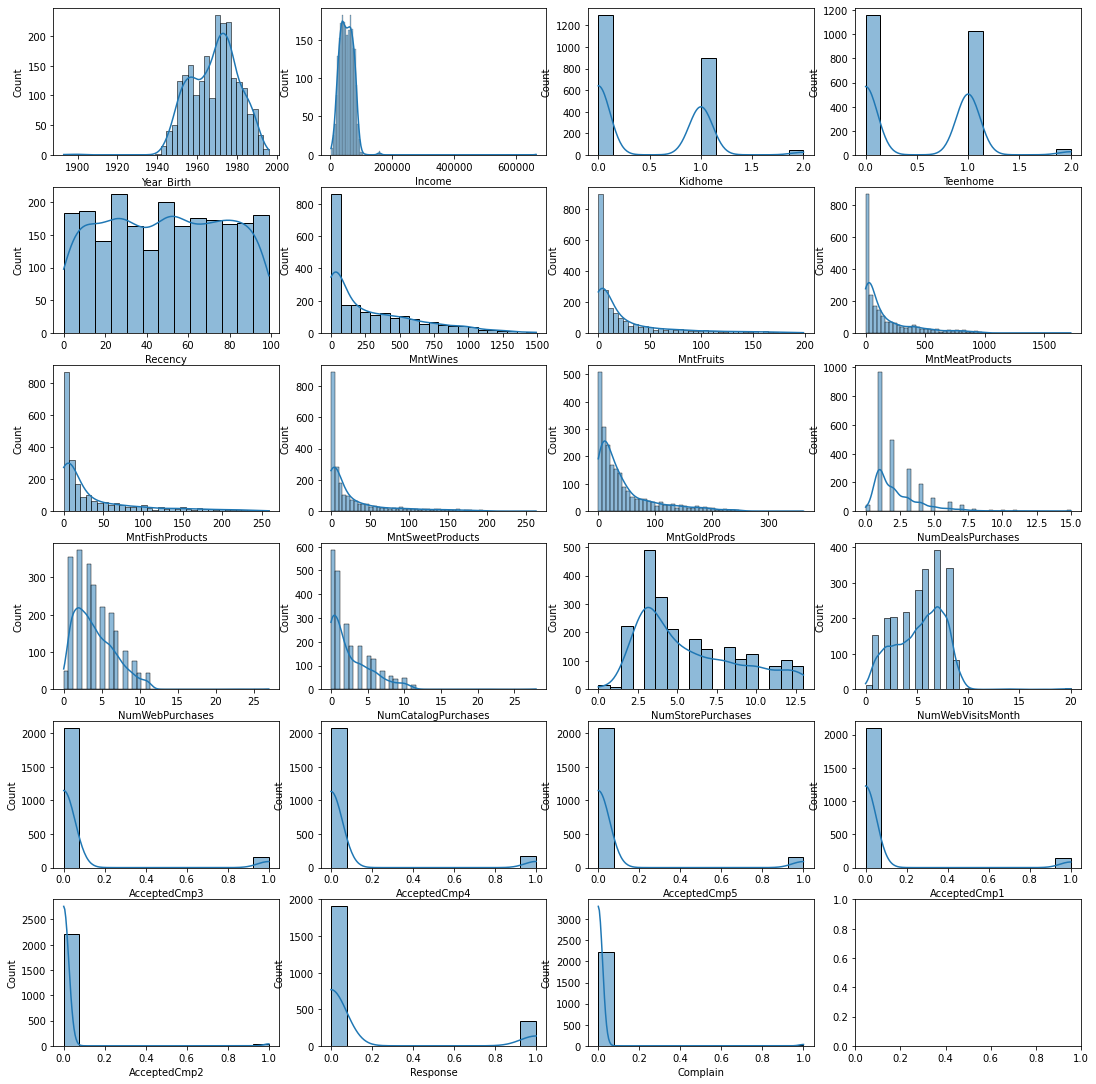

In [10]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15),  constrained_layout=True)

fig.tight_layout()

for idx, (feature, ax) in enumerate(zip(num_features, axes.flat)):
    sns.histplot(data=marketing_df, x=feature, kde=True, palette='tab10', ax=ax)

Right away, we can notice the following:
- Most of the features are **right skewed** (**Income**, **MntX**, etc)
- **Year_Birth**, **Income**, **NumWebVisitsMonth** are bimodally distributed
- **AcceptCmpX**, **Response**, **Complain** are binomially distributed (thanks to 0/1 they can take)
- **Recency** resambles uniform distribution 
- There are outliers in **Year_Birth** features: left tail of the distribution goes beyond 1900 in the left direction (hard to believe that there were 100+ year-old people that shopped)
- All right skewed features have outliers 

In [11]:
skewness_df = pd.DataFrame({
    'feature': [], 
    'skewness': [], 
    'kurtosis': [], 
    'boxcox_skewness': [], 
    'boxcox_kurtosis': [],
    'log_skewness': [],
    'log_kurtosis': [],
    'sqrt_skewness': [],
    'sqrt_kurtosis': [],
    'boxcox_test': [],
})

transformed_df = marketing_df.copy()

for feature in num_features:
    skewness = transformed_df[feature].skew()
    kurtosis = transformed_df[feature].kurtosis()

    transformed_df[feature + '_transformed'], boxcox_test = stats.boxcox(1 + transformed_df[feature])
    boxcox_skewness = transformed_df[feature + '_transformed'].skew()
    boxcox_kurtosis = transformed_df[feature + '_transformed'].kurtosis()

    transformed_df[feature + '_transformed'] = np.log1p(transformed_df[feature])
    log_skewness = transformed_df[feature + '_transformed'].skew()
    log_kurtosis = transformed_df[feature + '_transformed'].kurtosis()

    transformed_df[feature + '_transformed'] = np.sqrt(transformed_df[feature])
    sqrt_skewness = transformed_df[feature + '_transformed'].skew()
    sqrt_kurtosis = transformed_df[feature + '_transformed'].kurtosis()

    skewness_df = skewness_df.append({
            'feature': feature, 
            'skewness': skewness, 
            'kurtosis': kurtosis, 
            'boxcox_test': boxcox_test,
            'boxcox_skewness': boxcox_skewness, 
            'boxcox_kurtosis': boxcox_kurtosis,
            'log_skewness': log_skewness, 
            'log_kurtosis': log_kurtosis,
            'sqrt_skewness': sqrt_skewness, 
            'sqrt_kurtosis': sqrt_kurtosis,
        }, 
        ignore_index=True
    )

skewness_df

feature   skewness    kurtosis  boxcox_skewness  \
0            Year_Birth  -0.349944    0.717464        -0.007914   
1                Income   6.793855  161.198652         0.232561   
2               Kidhome   0.635288   -0.779661         0.332297   
3              Teenhome   0.407115   -0.986235         0.125449   
4               Recency  -0.001987   -1.201897        -0.282295   
5              MntWines   1.175771    0.598744        -0.146798   
6             MntFruits   2.102063    4.050976         0.019205   
7       MntMeatProducts   2.083233    5.516724        -0.016788   
8       MntFishProducts   1.919769    3.096461        -0.010966   
9      MntSweetProducts   2.136081    4.376548         0.020291   
10         MntGoldProds   1.886106    3.551709        -0.030453   
11    NumDealsPurchases   2.418569    8.936914        -0.000095   
12      NumWebPurchases   1.382794    5.703128        -0.016079   
13  NumCatalogPurchases   1.880989    8.047437         0.030684   
14    NumStorePurchases   0.702237   -0.622048        -0.006758   
15    NumWebVisitsMonth   0.207926    1.821614        -0.009542   
16         AcceptedCmp3   3.291705    8.843214         3.291705   
17         AcceptedCmp4   3.241574    8.515406         3.241574   
18         AcceptedCmp5   3.291705    8.843214         3.291705   
19         AcceptedCmp1   3.555444   10.650694         3.555444   
20         AcceptedCmp2   8.472093   69.838711         8.472093   
21             Response   1.971555    1.888714         1.971555   
22             Complain  10.188972  101.906135        10.188972   

    boxcox_kurtosis  log_skewness  log_kurtosis  sqrt_skewness  sqrt_kurtosis  \
0         -0.325483     -0.374130      0.831068      -0.361951       0.773214   
1          6.422854     -1.178552      3.243788       0.392383       8.008725   
2         -1.857231      0.418104     -1.598768       0.363641      -1.769883   
3         -1.873292      0.178684     -1.732310       0.121338      -1.883373   
4         -1.024081     -1.555820      2.371964      -0.631769      -0.437390   
5         -1.236387     -0.547198     -0.842255       0.393512      -1.024110   
6         -1.149458      0.083858     -1.128044       0.968118       0.175508   
7         -1.071366     -0.082692     -1.053591       0.946682       0.095817   
8         -1.087801     -0.052153     -1.089250       0.894395      -0.068961   
9         -1.171860      0.085683     -1.147726       0.975460       0.193373   
10        -0.621569     -0.341428     -0.418920       0.808973       0.104860   
11         0.268721      0.666507      0.354175       0.862813       1.840548   
12        -0.422779     -0.264285     -0.361270       0.007850       0.321926   
13        -1.174894      0.132260     -1.098875       0.164632      -0.698248   
14        -0.443392     -0.141956     -0.136926       0.145900      -0.342409   
15         0.958338     -1.021059      0.612505      -0.719046       0.561060   
16         8.843214      3.291705      8.843214       3.291705       8.843214   
17         8.515406      3.241574      8.515406       3.241574       8.515406   
18         8.843214      3.291705      8.843214       3.291705       8.843214   
19        10.650694      3.555444     10.650694       3.555444      10.650694   
20        69.838711      8.472093     69.838711       8.472093      69.838711   
21         1.888714      1.971555      1.888714       1.971555       1.888714   
22       101.906135     10.188972    101.906135      10.188972     101.906135   

    boxcox_test  
0     18.817723  
1      0.464554  
2     -1.414093  
3     -0.556995  
4      0.713632  
5      0.189107  
6     -0.031961  
7      0.030120  
8      0.018210  
9     -0.032643  
10     0.113507  
11    -0.487185  
12     0.189567  
13    -0.102409  
14     0.108127  
15     0.864478  
16   -19.825700  
17   -19.350731  
18   -19.825700  
19   -22.441862  
20  -107.721233  
21    -9.592102  
22  -153.887473

- Box-Cox transformation **helped** majority of features to be **more "normal"**, but **not all**
- **AcceptedCmpX, Response, Complain** doesn't transform well (because they are binary)
- Box-Cox transformation doesn't help with **Kidhome, Teenhome, Recency**
- The best shot for **Recency** is sqrt transformation. 
- **Kidhome** and **Teenhome** are similarly distributed in a categorical manner. Let's think how we are going to handle them (?)

In [12]:
boxcox_transform_features = [
    'Year_Birth',
    'Income',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
]

for feature in boxcox_transform_features:
    marketing_df[feature + '_transformed'], _ = stats.boxcox(1 + marketing_df[feature])

marketing_df['Recency_transformed'] = np.sqrt(marketing_df['Recency'])

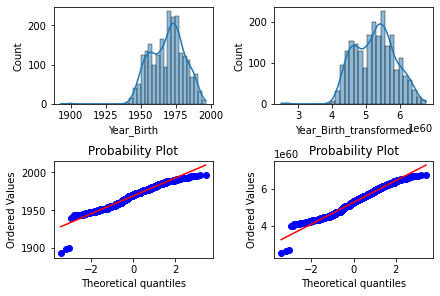

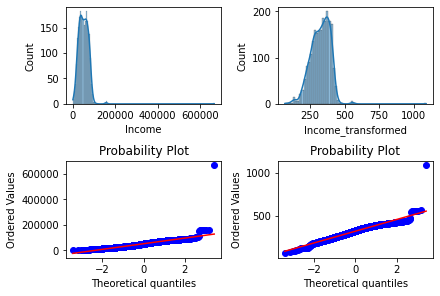

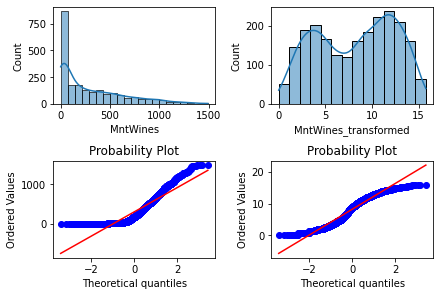

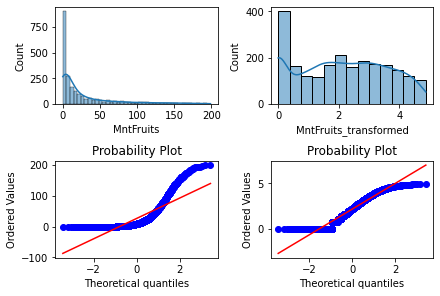

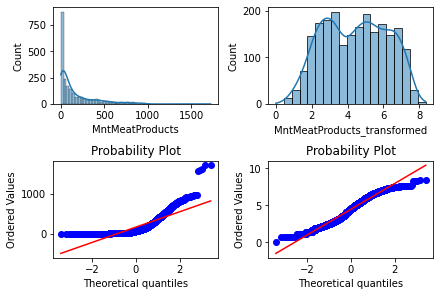

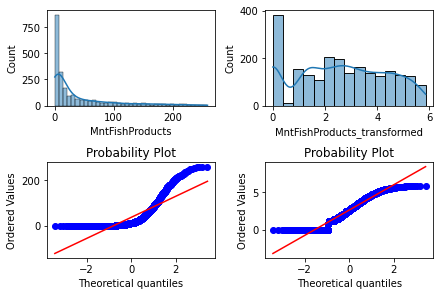

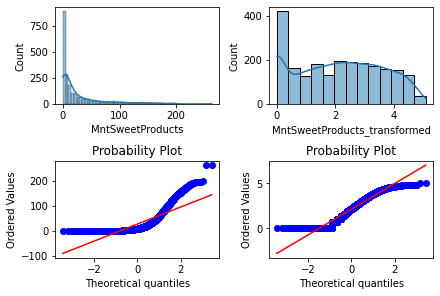

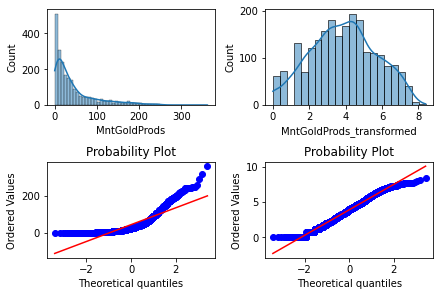

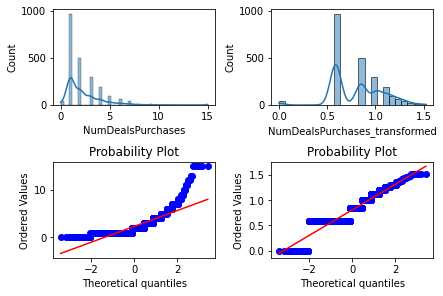

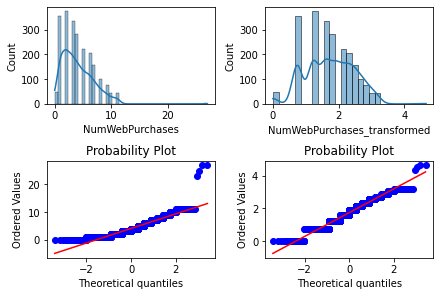

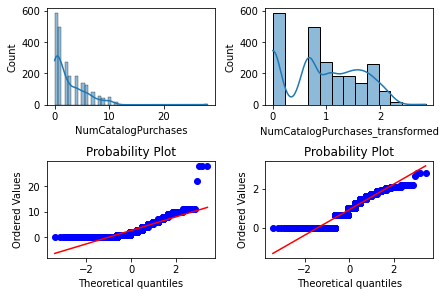

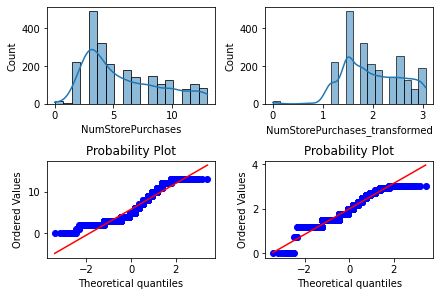

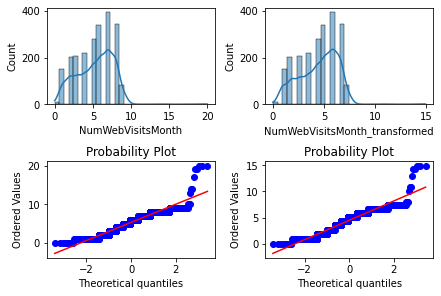

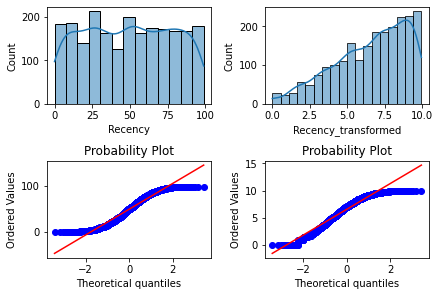

In [13]:
feature_to_check_normality = boxcox_transform_features + ['Recency']

for feature in feature_to_check_normality:
    _, ax = plt.subplots(2, 2, constrained_layout=True)
    
    # show original distribution and its probability-probability plot
    sns.histplot(data=marketing_df, x=feature, kde=True, palette='tab10', ax=ax[0][0])
    stats.probplot(marketing_df[feature], dist=stats.norm, plot=ax[1][0])

    # show transformed distribution and its probability-probability plot 
    sns.histplot(data=marketing_df, x=feature + '_transformed', kde=True, palette='tab10', ax=ax[0][1])
    stats.probplot(marketing_df[feature + '_transformed'], dist=stats.norm, plot=ax[1][1])

- Most of the features did become more **normaly** distributed
- **NumWebVisitsMonth** doesn't seem to transformed **much** (?)
- **Recency** distribution strated to look like **a stair**
- Transformation revealed that **MntX** and **NumXPurchases** features are **multimodal**

## Outliers

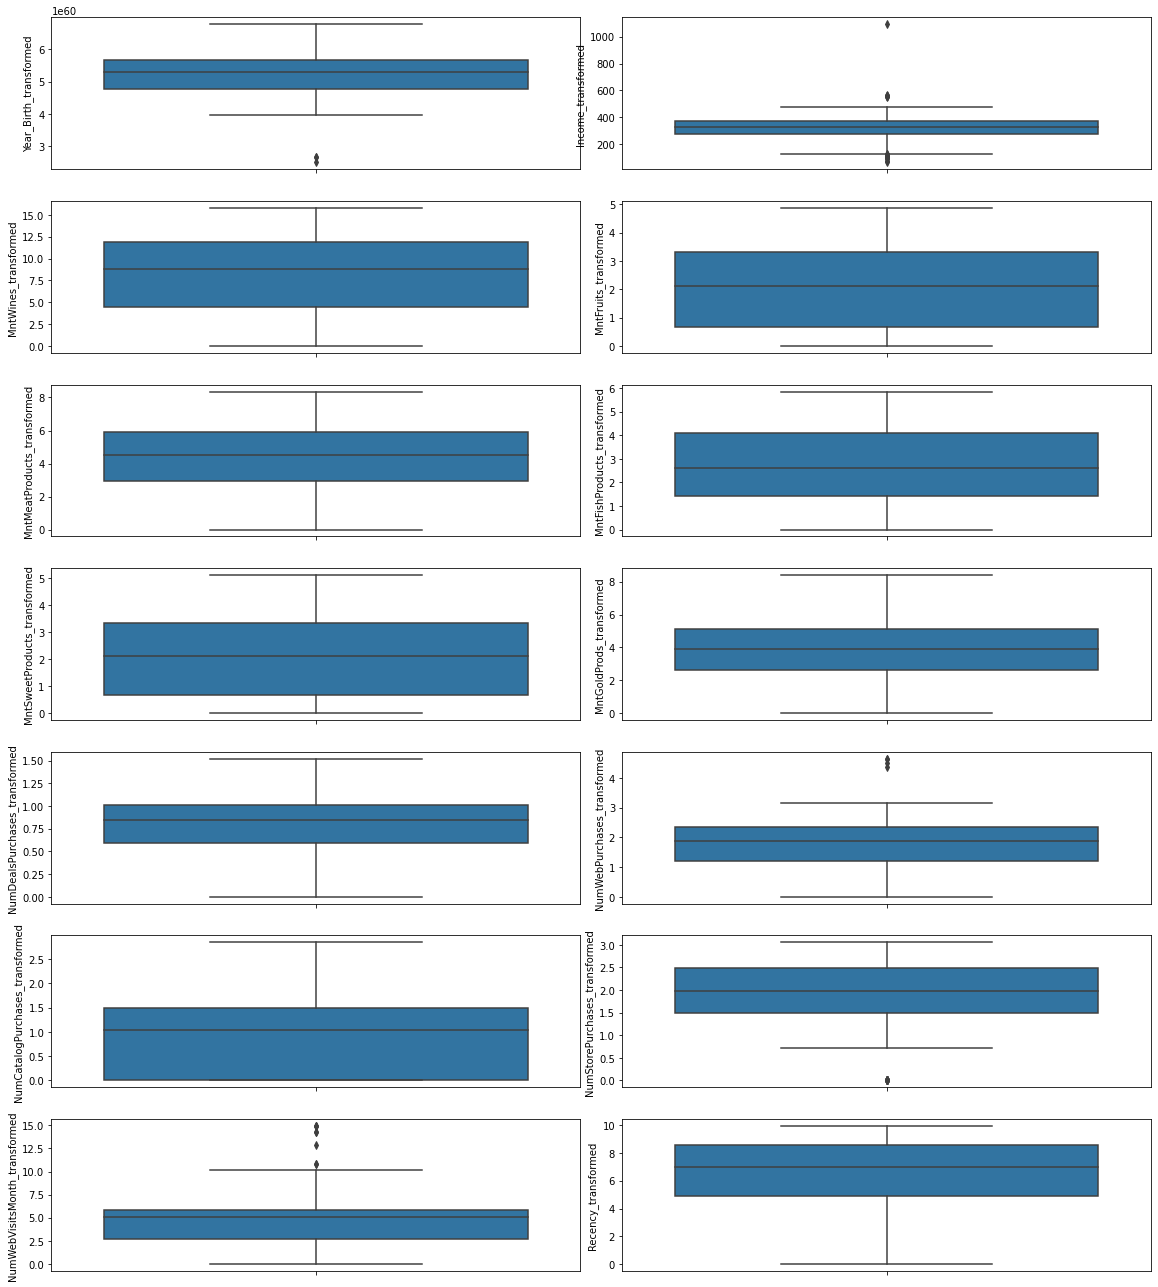

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 18), constrained_layout=True)

fig.tight_layout()

for idx, (feature, ax) in enumerate(zip(feature_to_check_normality, axes.flat)):
    if feature + '_transformed' in marketing_df:
        feature = feature + '_transformed'

    sns.boxplot(data=marketing_df, y=feature, palette='tab10', ax=ax)

<AxesSubplot:xlabel='Education', ylabel='Count'>

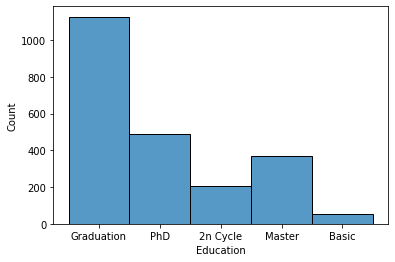

In [15]:
sns.histplot(data=marketing_df, x='Education')

# Statistical Analysis

### Section Goals

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?

# Data Visualization

### Section Goals

- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?